<a href="https://colab.research.google.com/github/LikhanBiswas/Minsk/blob/main/DenseNet_batch_size32_with_15_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#gpu memory usage
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
#version of tenserflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
#imported libraries of DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# resized images
img_size = [224,224]
train_path = '/content/drive/MyDrive/thesis 2020-2021/real vs fake/train'
valid_path = '/content/drive/MyDrive/thesis 2020-2021/real vs fake/test'

In [ ]:
#Implementing DenseNet121 built in function within Keras
#Pretrained on ImageNet weights
#include_top= False because-to not use 1st and last layers.
den = DenseNet121(include_top= False, weights= 'imagenet', input_shape= img_size + [3])

29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
#all false because using transfer learning technique 
for layer in den.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/thesis 2020-2021/real vs fake/train')

In [ ]:
folders

['/content/drive/MyDrive/thesis 2020-2021/real vs fake/train']

In [ ]:
len(folders)

1

In [ ]:
#flattening as won't be using the last layer.
#dense(2= how many outpt mode I want, softmax= for having multiple categories
x = Flatten()(den.output)
prediction = Dense(2,activation= 'softmax')(x)

#create a model object
model = Model(inputs = den.input, outputs = prediction)

In [ ]:
# last line showing total inside the training we've 2 layers
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#assigning cost/loss function and optimization
#cost/loss function: categorical_crossentropy
#optimizer: adams
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [ ]:
#importing images from the dataset
#dataaug apply only on train, not in
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# target size = initialied for the image size
# batch size is a number of samples processed before the model is updated
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/thesis 2020-2021/real vs fake/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/thesis 2020-2021/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15024 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [ ]:
#fit the model
#epochs is the number of complete passes through the training dataset
f = model.fit_generator(
    training_set, 
    validation_data = test_set,
    epochs = 15,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
470/470 [==============================] - 1299s 3s/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 5.1544e-04 - val_accuracy: 0.9999
Epoch 2/15
470/470 [==============================] - 271s 576ms/step - loss: 1.6757e-06 - accuracy: 1.0000 - val_loss: 6.0230e-04 - val_accuracy: 0.9999
Epoch 3/15
470/470 [==============================] - 214s 455ms/step - loss: 1.5782e-06 - accuracy: 1.0000 - val_loss: 7.2767e-04 - val_accuracy: 0.9998
Epoch 4/15
470/470 [==============================] - 213s 454ms/step - loss: 0.0154 - accuracy: 0.9984 - val_loss: 5.1617e-09 - val_accuracy: 1.0000
Epoch 5/15
470/470 [==============================] - 213s 453ms/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 6.8166e-04 - val_accuracy: 0.9999
Epoch 6/15
470/470 [==============================] - 213s 452ms/step - loss: 0.0137 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9998
Epoch 7/15
470/470 [==============================] - 213s 453ms/step - loss: 4.9659e-04 - accurac

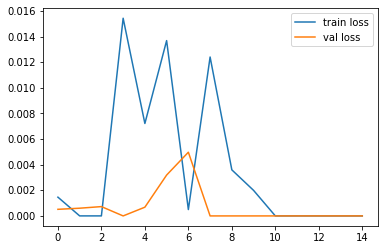

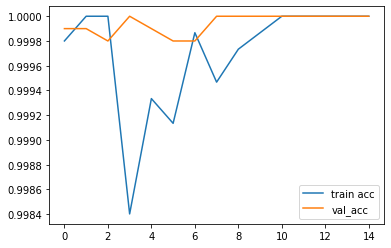

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotted the loss
plt.plot(f.history['loss'], label='train loss')
plt.plot(f.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotted the accuracy
plt.plot(f.history['accuracy'], label = 'train acc')
plt.plot(f.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')